In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Kolkata.csv')

In [4]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Jai Hind Dhaba,450,"North Indian,Chinese,Rolls",Kolkata,Paddapukur,Dhaba,12noon to 2am(Mon-Sun),Very Good,4.1,2420
1,The Irish House,1900,"Fast Food,Italian",Kolkata,Quest Mall-- Ballygunge,Pub,"12noon to 1130pm(Mon,Tue,Wed,Thu,Sun),12noon...",Very Good,4.4,3522
2,10 Downing Street,1600,"Continental,North Indian,Chinese",Kolkata,Sector 5-- Salt Lake,Pub,"12noon to 1145pm(Mon,Tue,Wed,Thu,Sun),12noon...",Very Good,4.3,2337
3,Rang De Basanti Dhaba,800,North Indian,Kolkata,Sector 5-- Salt Lake,Casual Dining,12noon to 2am(Mon-Sun),Very Good,4.0,2801
4,Monkey Bar,1500,"American,North Indian,South Indian,Pizza,Burge...",Kolkata,Camac Street Area,Bar,"12noon to 12midnight(Mon,Tue,Wed,Thu,Sun)...",Very Good,4.2,1725


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3462 entries, 0 to 3461
Data columns (total 10 columns):
Name                3462 non-null object
Price               3462 non-null int64
Cuisine_Category    3462 non-null object
City                3462 non-null object
Region              3462 non-null object
Cuisine_Type        3462 non-null object
Timing              3458 non-null object
Rating_Types        3462 non-null object
Rating              3462 non-null float64
Votes               3462 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 270.5+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [6]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [7]:
data.describe()

,Price,Rating,Votes
count,3462.000000,3462.000000,3462.000000
mean,448.264009,3.441363,219.213460
std,292.372376,0.422331,511.151714
min,100.000000,2.200000,4.000000
25%,250.000000,3.125000,20.000000
50%,400.000000,3.400000,61.000000
75%,500.000000,3.700000,199.000000
max,3000.000000,4.900000,11482.000000


In [8]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              4
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [9]:
data.Name.value_counts().head()

Just Fried               4
CFC                      3
Aahar Restaurant         3
Z Momo                   3
Kolkata Fried Chicken    3
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [10]:
data['Region'].value_counts()[:10]

New Town                132
Behala                  121
Sector 5-- Salt Lake    113
Tollygunge              110
Dum Dum                  99
Barasat                  76
Jadavpur                 75
Sector 1-- Salt Lake     74
Kasba                    71
Ballygunge               67
Name: Region, dtype: int64

Text(0.5,1,'Region')

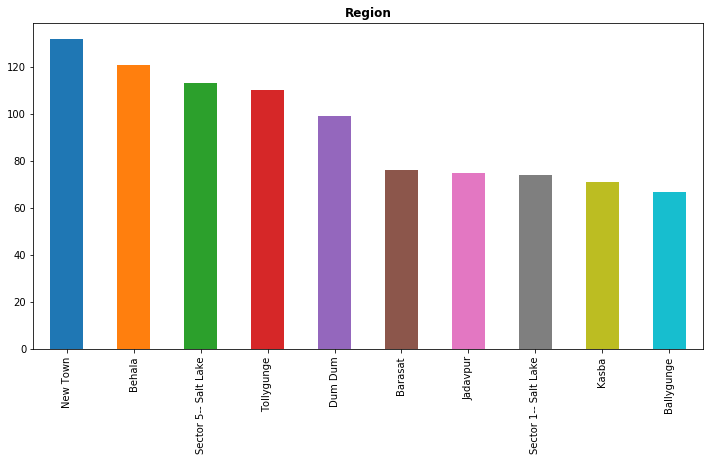

In [11]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

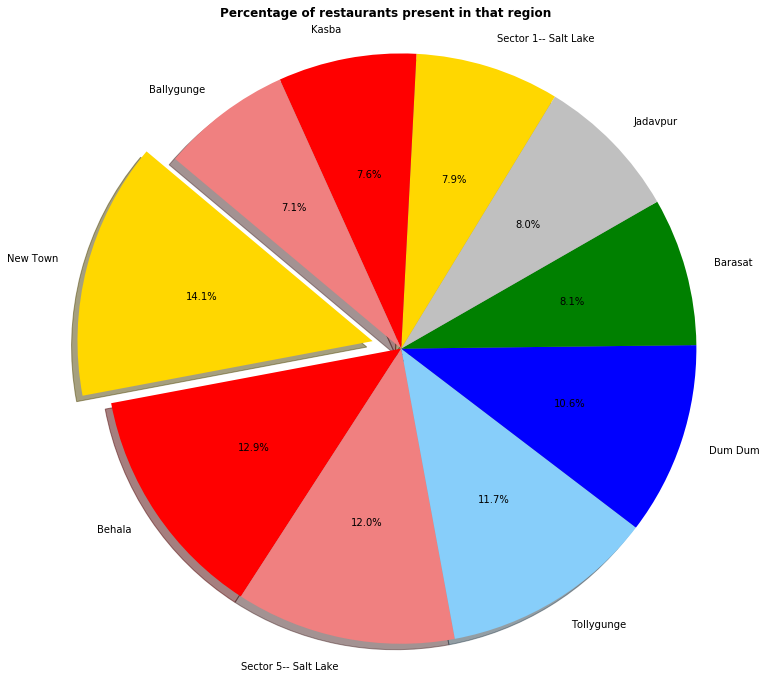

In [12]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [13]:
data['Rating_Types'].value_counts().head(10)

Average      1805
Good         1191
Very Good     382
Excellent      40
Poor           20
Bom             5
İyi             4
Baik            3
Media           2
Terbaik         2
Name: Rating_Types, dtype: int64

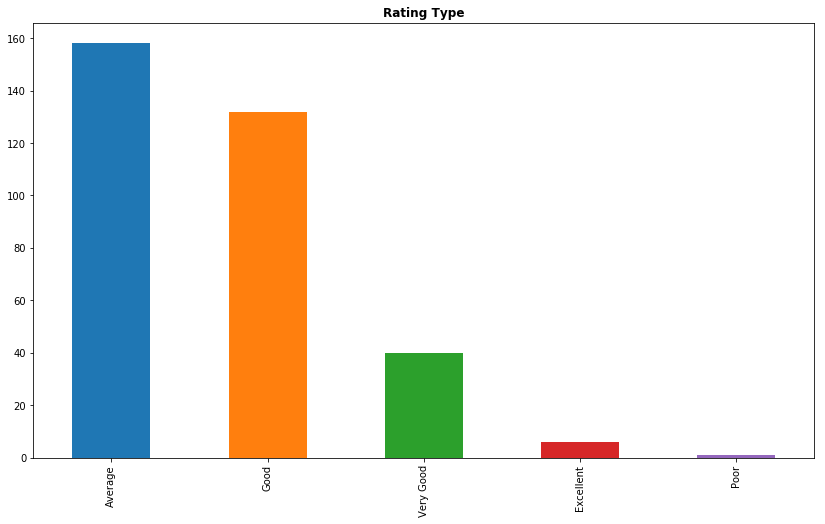

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       1218
Casual Dining     1014
none               621
Café               169
Bakery             158
Dessert Parlor      55
Sweet Shop          54
Food Court          41
Dhaba               27
Beverage Shop       22
Name: Cuisine_Type, dtype: int64

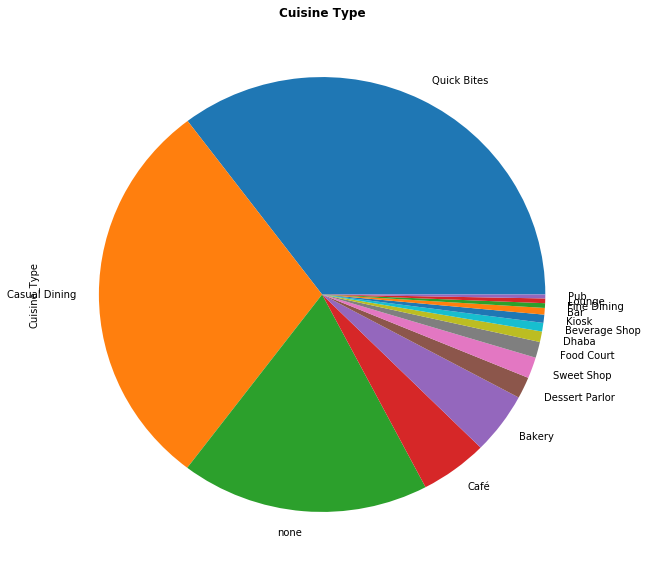

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [16]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [17]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.4410641989589377


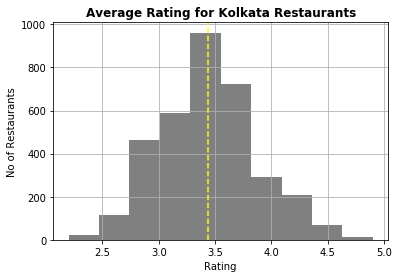

In [18]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Kolkata Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [19]:
#Average rating per restaurant in Kolkata is found to be around 3.4

# Top cuisines in Kolkata

In [20]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

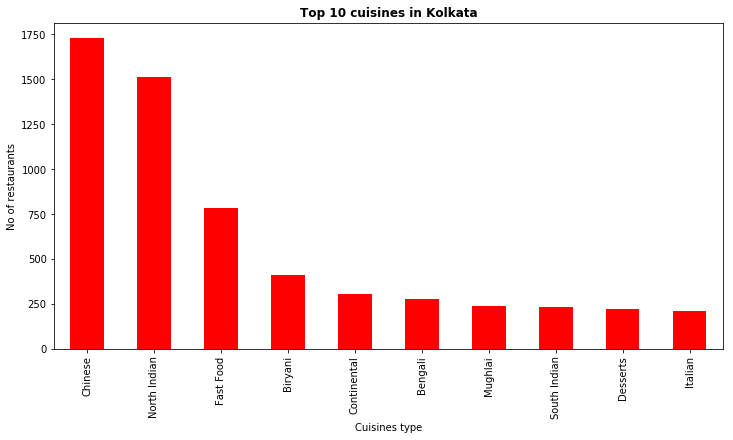

In [21]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Kolkata',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [22]:
data['Price'].value_counts()[:20]

300     630
400     454
500     417
200     398
250     276
600     216
350     169
150     136
800     124
700     101
1000     87
450      85
100      59
550      57
900      44
650      41
1200     36
1500     24
750      18
1600     12
Name: Price, dtype: int64

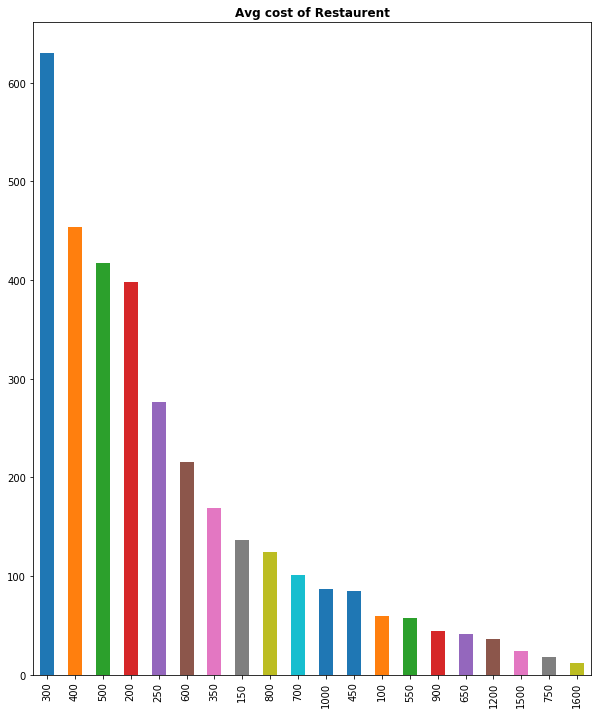

In [23]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [24]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

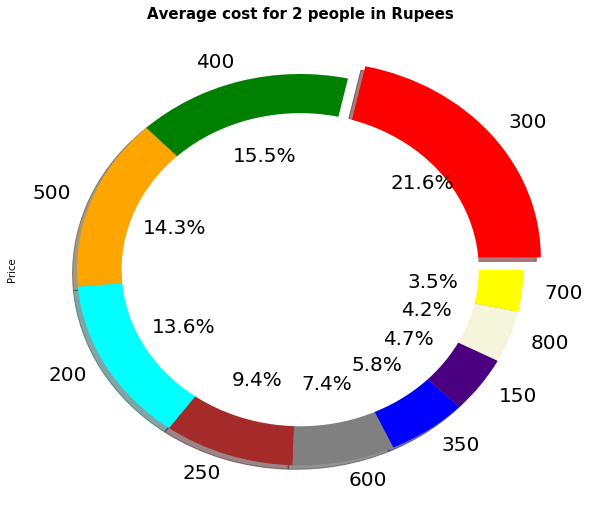

In [25]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300